# LSST Milky Way Satellite Color-Magnitude Diagram

Author: Alex Drlica-Wagner

This notebook makes a plot of the color-magnitude diagram of an injected satellite along with the distribution of foreground objects. It relies on the `simple_adl` package, as well as having access to the DC2 satellite simulations and outputs. This went into producing Figure 3 of [Tsiane et al. (2025)](https://arxiv.org/pdf/2504.16203).

In [1]:
import os, sys
import glob

import numpy as np
import matplotlib.pyplot as plt
import importlib
from astropy.io import fits
import fitsio

In [2]:
SATSIM = "/project/shared/data/satsim"
sys.path.append(os.path.expandvars('./simple_adl'))
from simple_adl.load_data import load_and_merge
import simple_adl.plot
import simple_adl.isochrone

/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/dustmaps/config.py:151: ConfigWarning: Overriding default configuration file with /opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/share/eups/Linux64/dustmaps_cachedata/gbb0a0c949e+fcb1d3bbc8/config/.dustmapsrc
  warn('Overriding default configuration file with {}'.format(config_fname),


In [3]:
def print_satellite(satellite):
    for key in ['MC_SOURCE_ID', 'RA', 'DEC', 'DISTANCE', 'DISTANCE_MODULUS', 'R_PHYSICAL', 'ABS_MAG', 'N_CATALOG', 'FRACDET_WIDE']:
        print(f"{key}: {satellite[key]}") 

def get_popfile(mc_source_id, version='v6'):
    lower = (mc_source_id//100)*100+1
    upper = lower + 99

    dirname = f"{SATSIM}/lsst_dc2_{version}"
    basename = f"sim_population_lsst_dc2_{version}_mc_source_id_{lower:07d}-{upper:07d}.fits"

    return f"{dirname}/{basename}"
    
def get_catfile(mc_source_id, version='v6'):
    lower = (mc_source_id//100)*100+1
    upper = lower + 99

    dirname = f"{SATSIM}/lsst_dc2_{version}"
    basename = f"sim_catalog_lsst_dc2_{version}_mc_source_id_{lower:07d}-{upper:07d}.fits"

    return f"{dirname}/{basename}"

    
def get_catalog(mc_source_id, version='v6'):
    filename = get_catfile(mc_source_id, version)
    cat = fitsio.read(filename)
    cat = cat[cat['MC_SOURCE_ID'] == mc_source_id]
    return cat


In [4]:
# This cell takes ~6min to run
#sim_id = 23121
#sim_id = 2033
#sim_id = 94858
sim_id = 19833
v6_sim_data, v6_real_data, v6_merged_data, iso_search, iso_selection = load_and_merge(sim_id=sim_id, truth_matching=False)
v7_sim_data, v7_real_data, v7_merged_data, iso_search, iso_selection = load_and_merge(sim_id=sim_id, truth_matching=True)

Querying region (66.35197, -30.064634)
Satellites at  (66.35197, -30.064634) :
 [19831 19832 19833 19834 19835 19836 19837 19839 19840]


/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Querying region (66.35197, -30.064634)
Satellites at  (66.35197, -30.064634) :
 [19831 19832 19833 19834 19835 19836 19837 19839 19840]


/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


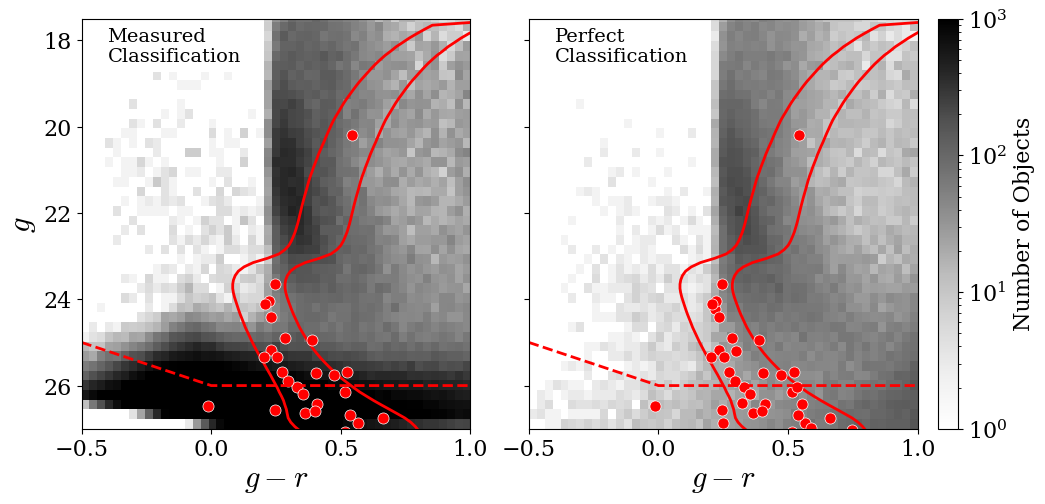

In [5]:
importlib.reload(simple_adl.plot)

fig, axs = plt.subplots(figsize=(13, 5), nrows=1, ncols=2, sharey=True)
plt.subplots_adjust(top=0.97, bottom=0.15, wspace=0.15)
_ = simple_adl.plot.plot_cmd_sep(v6_real_data, v6_sim_data, axs[0], cbar=False, show_iso=True, iso_selection=iso_selection)
p = simple_adl.plot.plot_cmd_sep(v7_real_data, v7_sim_data, axs[1], cbar=False, show_iso=True, iso_selection=iso_selection)
#axs[1].get_yaxis().set_visible(False)
axs[0].annotate('Measured\nClassification', (-0.4, 18.5), bbox=dict(facecolor='w',lw=0),fontsize=14)
axs[1].annotate('Perfect\nClassification', (-0.4, 18.5), bbox=dict(facecolor='w',lw=0),fontsize=14)
axs[1].set_ylabel('')
axs[0].set_ylim(27,17.5)
axs[0].plot( [-0.5, 0, 1.0], [25, 26, 26], ls='--', color='r', lw=2)
axs[1].plot( [-0.5, 0, 1.0], [25, 26, 26], ls='--', color='r', lw=2)
cbar = plt.colorbar(p, ax=axs, pad=0.02)
cbar.set_label('Number of Objects')
plt.savefig('dc2_cmd_iso.pdf')
plt.show()

In [6]:
lower = (sim_id//100)*100+1
upper = lower + 99

for version in 'v6', 'v7':
    dirname = f"{SATSIM}/lsst_dc2_{version}"
    basename = f"sim_population_lsst_dc2_{version}_mc_source_id_{lower:07d}-{upper:07d}.fits"
    print(basename)
    filename = os.path.join(dirname,basename)
    assert os.path.exists(filename)
    population = fits.open(filename)[1].data
    sel = population['MC_SOURCE_ID'] == sim_id
    for sat in population[sel]:
        print_satellite(sat)
    print()

sim_population_lsst_dc2_v6_mc_source_id_0019801-0019900.fits
MC_SOURCE_ID: 19833
RA: 66.35196685791016
DEC: -30.064634323120117
DISTANCE: 91.09896850585938
DISTANCE_MODULUS: 19.79756736755371
R_PHYSICAL: 0.010350239463150501
ABS_MAG: -0.2924167811870575
N_CATALOG: 30
FRACDET_WIDE: 1.0

sim_population_lsst_dc2_v7_mc_source_id_0019801-0019900.fits
MC_SOURCE_ID: 19833
RA: 66.35196685791016
DEC: -30.064634323120117
DISTANCE: 91.09896850585938
DISTANCE_MODULUS: 19.79756736755371
R_PHYSICAL: 0.010350239463150501
ABS_MAG: -0.2924167811870575
N_CATALOG: 96
FRACDET_WIDE: 1.0



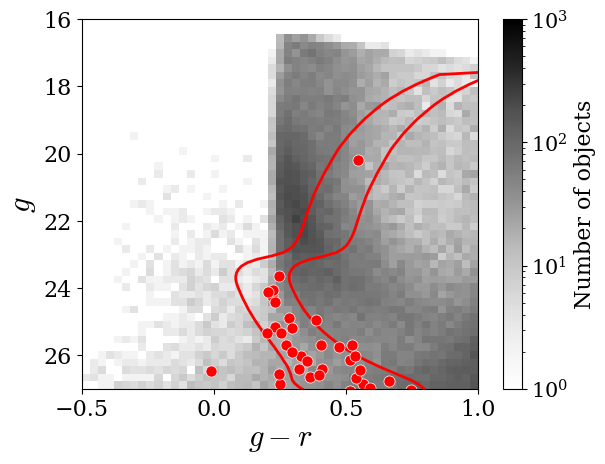

In [7]:
fig, axs = plt.subplots()
simple_adl.plot.plot_cmd_sep(v7_real_data, v7_sim_data, axs, show_iso=True, iso_selection=iso_selection)

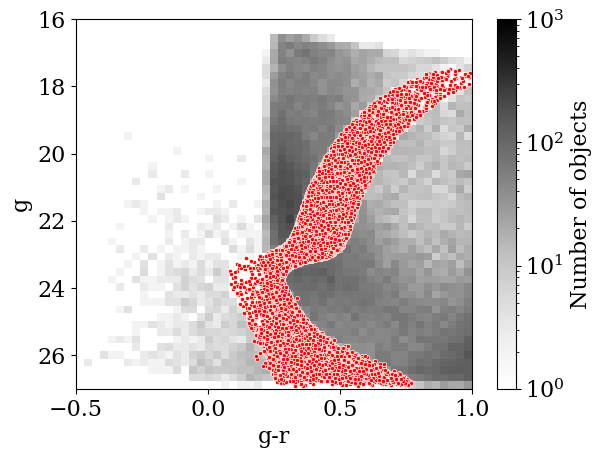

In [8]:
fig, axs = plt.subplots()
simple_adl.plot.plot_cmd_sep_iso(v7_merged_data, iso_selection[0], axs)